In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Data:

In [3]:
df = pd.read_csv('/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv')
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
df.shape

(1000, 7)

In [5]:
df.isna().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


# Graphics: 

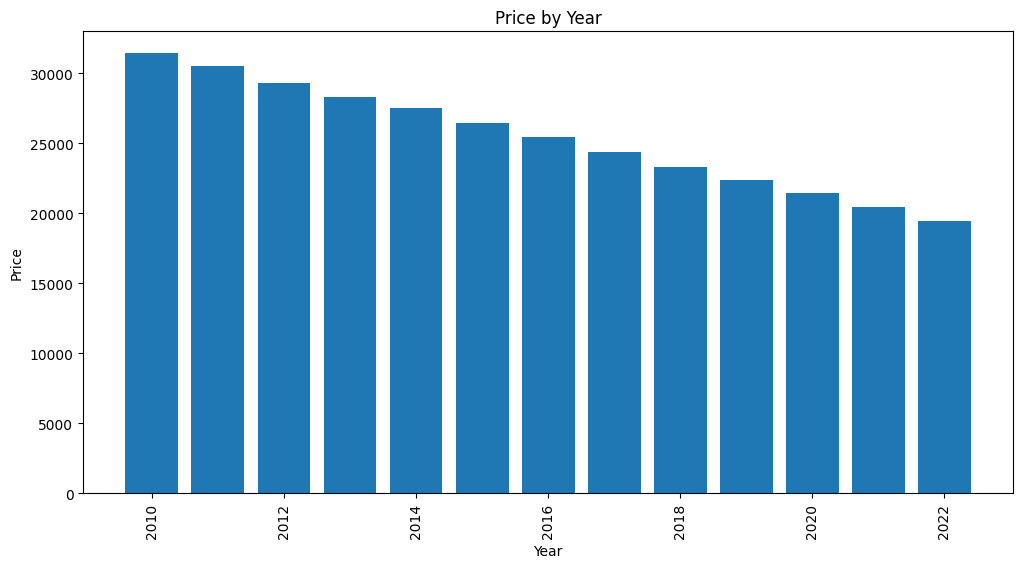

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price by Year')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


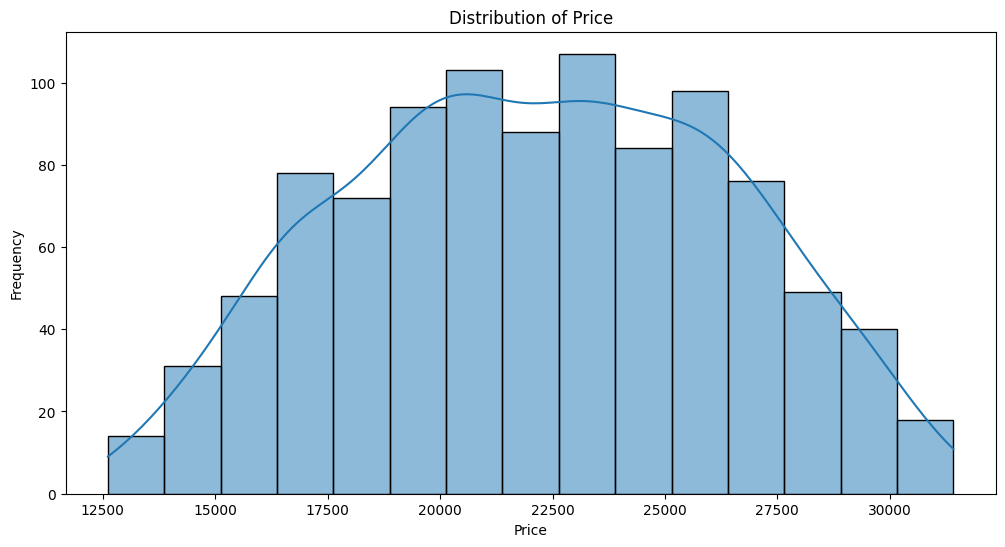

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

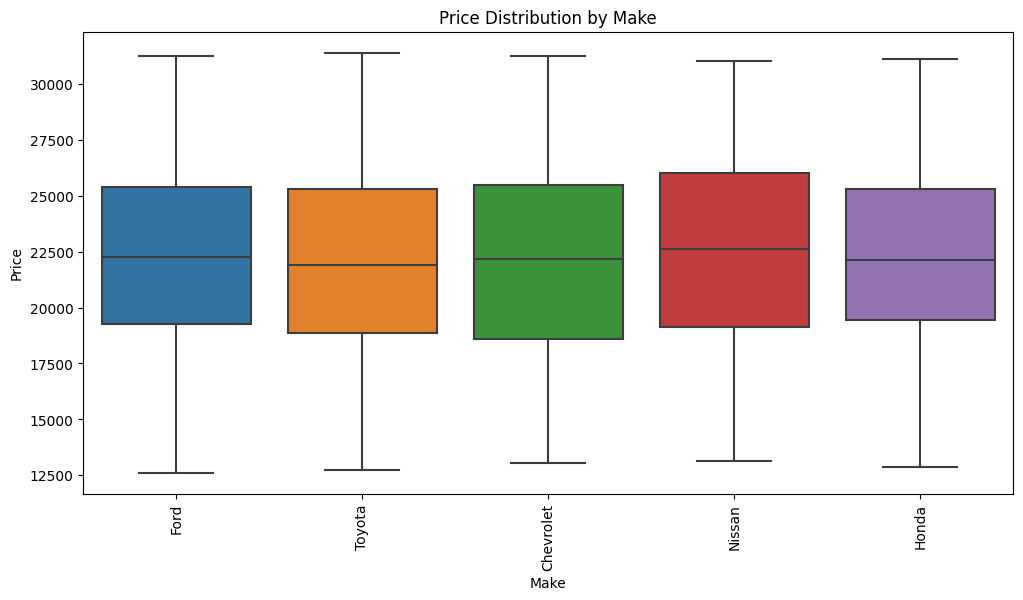

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Price', data=df)
plt.title('Price Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

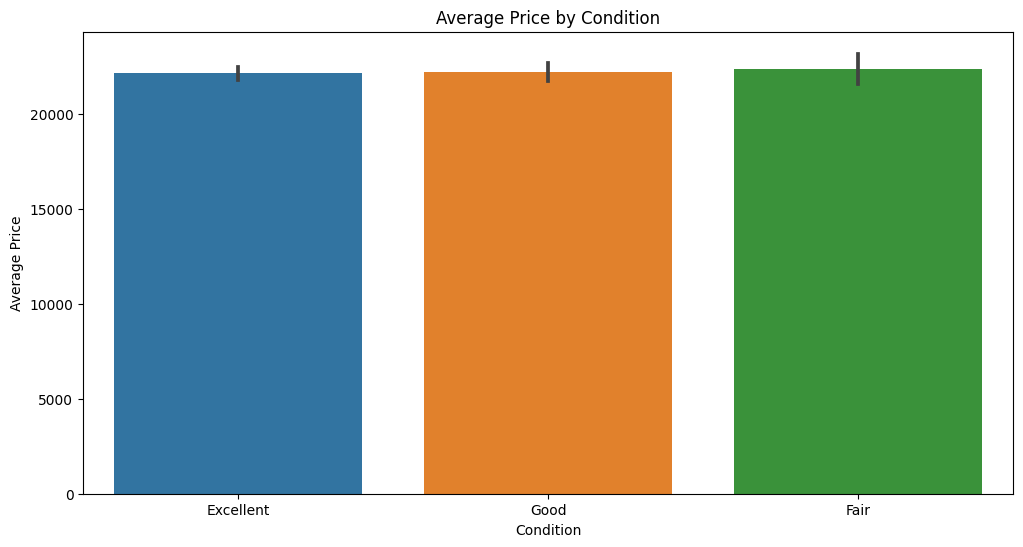

In [10]:
# Bar plot by Condition
plt.figure(figsize=(12, 6))
sns.barplot(x='Condition', y='Price', data=df)
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()

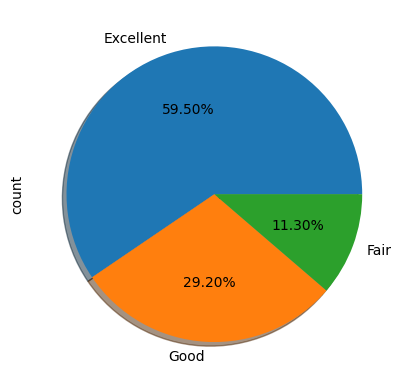

In [11]:
df["Condition"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

# Data analysis: 

In [12]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,1,4,2022,18107,0,19094.75
1,1,4,4,2014,13578,0,27321.10
2,2,0,2,2016,46054,2,23697.30
3,3,1,2,2022,34981,0,18251.05
4,4,0,2,2019,63565,0,19821.85


In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,-1.730320,-0.686394,1.456316,1.622767,-1.524017,-0.781622,-0.730711
1,-1.726856,1.412669,1.456316,-0.493311,-1.637747,-0.781622,1.208063
2,-1.723391,-1.386081,0.064044,0.035709,-0.822225,1.461197,0.354011
3,-1.719927,-0.686394,0.064044,1.622767,-1.100285,-0.781622,-0.929553
4,-1.716463,-1.386081,0.064044,0.829238,-0.382497,-0.781622,-0.559349


In [14]:
X = df_scaled.drop('Price',axis=1)
Y = df_scaled['Price']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Regression model: 

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.07553886163987585


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0012211801330957702
